In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [2]:
data = pd.read_csv('data_4.05_activities/files_for_activities/lesson_4.05_data.csv')
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,F,other,T,4,E,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,M,H,S,2,G,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,M,U,R,4,E,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,F,U,R,4,E,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,F,H,S,2,F,6.864865


In [3]:
data['RFA_frequency'] = data['RFA_frequency'].astype("object")

In [4]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [5]:
data.shape

(88393, 14)

In [6]:
data.dtypes

HV1                 int64
IC1                 int64
IC5                 int64
CARDPROM            int64
NUMPRM12            int64
NGIFTALL            int64
TIMELAG           float64
year              float64
GENDER             object
HOMEOWNR           object
DOMAIN_letters     object
RFA_frequency      object
RFA_monetary       object
AVGGIFT           float64
dtype: object

In [7]:
data.isnull().sum()

HV1               0
IC1               0
IC5               0
CARDPROM          0
NUMPRM12          0
NGIFTALL          0
TIMELAG           0
year              0
GENDER            0
HOMEOWNR          0
DOMAIN_letters    0
RFA_frequency     0
RFA_monetary      0
AVGGIFT           0
dtype: int64

In [8]:
categoricals = data.select_dtypes(np.object) # 5 columns cat
categoricals.head()

,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary
0,F,other,T,4,E
1,M,H,S,2,G
2,M,U,R,4,E
3,F,U,R,4,E
4,F,H,S,2,F


In [9]:
numericals = data.select_dtypes(np.number) # 9 columns num
numericals.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,6.864865


In [10]:
y = numericals['AVGGIFT']
numericals = numericals.drop(['AVGGIFT'], axis=1)

In [11]:
numericals.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year
0,479,307,12883,27,14,31,4.0,37.000000
1,5468,1088,36175,12,13,3,18.0,52.000000
2,497,251,11576,26,14,27,12.0,37.570799
3,1000,386,15130,27,14,16,9.0,28.000000
4,576,240,9836,43,25,37,14.0,20.000000


In [12]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [13]:
pd.DataFrame(x_standardized)

,0,1,2,3,4,5,6,7
0,-0.615805,-0.197546,-0.327329,1.015038,0.287697,2.563947,-5.221388e-01,-4.223845e-02
1,4.724826,4.624687,2.413425,-0.736841,0.057410,-0.762852,1.253030e+00,1.067743e+00
2,-0.596536,-0.543314,-0.481123,0.898246,0.287697,2.088690,4.922435e-01,-1.674335e-11
3,-0.058084,0.290234,-0.062926,1.015038,0.287697,0.781733,1.118501e-01,-7.082272e-01
4,-0.511968,-0.611233,-0.685867,2.883710,2.820857,3.276833,7.458391e-01,-1.300217e+00
...,...,...,...,...,...,...,...,...
88388,-0.343903,-0.333384,-0.503009,0.547870,-0.172878,1.732247,-6.489366e-01,7.717479e-01
88389,-0.070930,0.580433,0.369744,-1.437593,-0.172878,-1.000480,-1.154796e-12,-1.674335e-11
88390,0.668773,2.883497,1.279446,-1.671177,-1.094027,-1.000480,-1.154796e-12,9.197454e-01
88391,-0.726064,-0.469221,-0.410286,-0.503257,0.978559,-0.287595,-6.489366e-01,3.176030e-02


In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [15]:
X = np.concatenate((x_standardized, encoded), axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r_squared = r2_score(y_test, predictions)

In [18]:
r_squared

0.47136213656840853

In [19]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [20]:
# from sklearn.neighbors import KNeighborsRegressor
# model = KNeighborsRegressor(n_neighbors=4)
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(5,40,3):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test)) # Rsquared value

Text(0, 0.5, 'Accuracy')

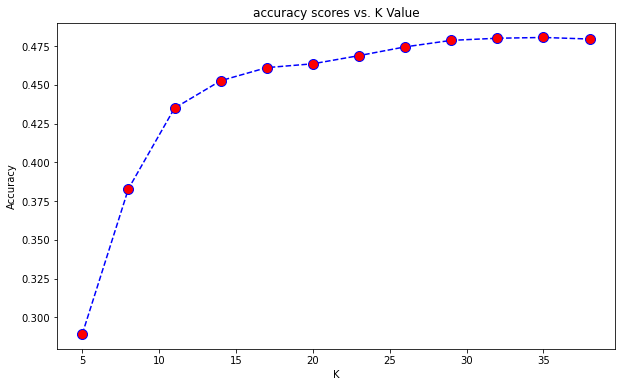

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(5,40,3),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# activity 2

# activity 4

## Lab

In [24]:
def models_automation(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model._class_._name_}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), KNeighborsREgressor(5)] # n_neighbors=5, p=2 (default)
              
models_automation(linear_models, X_train, y_train, X_test, y_test)

NameError: name 'LinearRegression' is not defined